# Introduction
---
We are going to build and train a convolutional neural network to classify the MNIST dataset. This dataset contains 60,000 training and 10,000 test images of handwritten digits from 0 to 9. It is a similar dataset to the one used in the first workshop but it is higher resolution (28x28).

In [47]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
# Keras import(s)
import tensorflow.nn as nn
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, AveragePooling2D, UpSampling2D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Custom imports
from funcs.plotting import plot_classifications, plot_training, plot_data

# Load in data

In [48]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plot the training data

In [49]:
x_train = x_train/x_train.max() # Normalise data so pixel values are between 0 and 1
x_test = x_test/x_test.max()

x_train = x_train[:,:,:,np.newaxis] # Add a new axis to the end. This axis is used to specifiy the RGB channel, however, we are working with greyscale images here.
x_test  = x_test [:,:,:,np.newaxis]
input_shape = x_train.shape[1:]
n_classes   = 10 # we have 10 different classes, ie 10 integers from 0 to 9

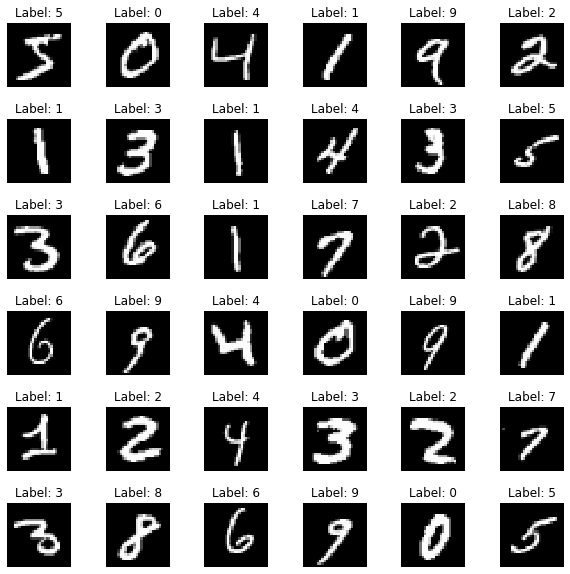

In [50]:
plot_data(x_train, y_train)

In [27]:
# For 8x8
# Connect input, intermediate, and output layers using the Keras functional API
i = Input(shape=input_shape)
x = Conv2D(8, kernel_size=(4,4), activation='relu')(i)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Conv2D(16, kernel_size=(4,4), activation='relu')(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Flatten()(x)
x = Dense(20, activation='relu')(x)
o = Dense(n_classes, activation='softmax')(x)

# Create Model
cnn = Model(i, o, name='CNN')

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 8)         136       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 16)          2064      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                340     

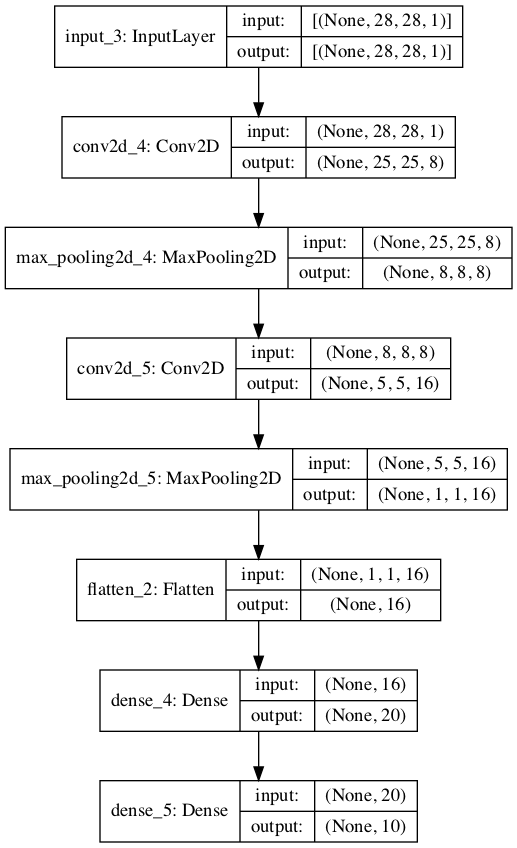

In [28]:
cnn.summary()
plot_model(cnn, show_shapes=True)

In [29]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2, batch_size=128, verbose=1)

Epoch 1/10
38/38 [==============================] - 1s 16ms/step - loss: 2.2441 - accuracy: 0.2354 - val_loss: 2.1263 - val_accuracy: 0.3733
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 1.9006 - accuracy: 0.4029 - val_loss: 1.6140 - val_accuracy: 0.4683
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 1.3406 - accuracy: 0.5669 - val_loss: 1.1747 - val_accuracy: 0.6117
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.9857 - accuracy: 0.6858 - val_loss: 0.9322 - val_accuracy: 0.7108
Epoch 5/10
38/38 [==============================] - 0s 10ms/step - loss: 0.8044 - accuracy: 0.7508 - val_loss: 0.7786 - val_accuracy: 0.7558
Epoch 6/10
38/38 [==============================] - 0s 10ms/step - loss: 0.7006 - accuracy: 0.7937 - val_loss: 0.7267 - val_accuracy: 0.7842
Epoch 7/10
38/38 [==============================] - 0s 10ms/step - loss: 0.6302 - accuracy: 0.8221 - val_loss: 0.6481 - val_accuracy: 0.8092
Epoch 8/10
38

Testing accuracy: 81.5%


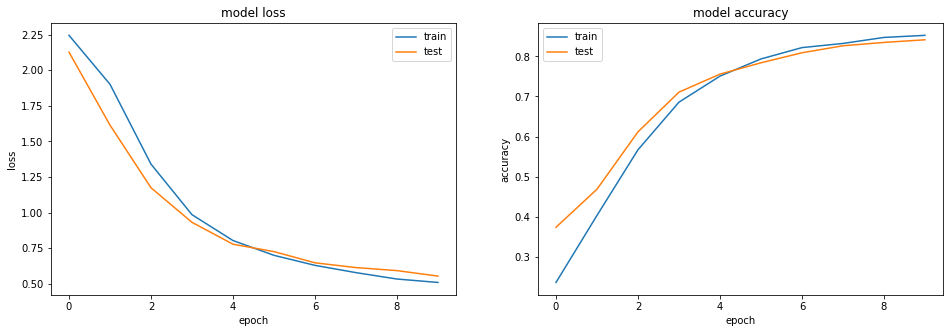

In [30]:
fig, axes = plt.subplots(1,2, figsize = (16,5))
for ax, name in zip(axes, ['loss','accuracy']):
    ax.plot(history_cnn.history[name])
    ax.plot(history_cnn.history['val_'+name])
    ax.set(title='model '+name, xlabel='epoch', ylabel=name)
axes[0].legend(['train', 'test'])
axes[1].legend(['train', 'test'])

# Calculate accuracy on entire test set
_, acc = cnn.evaluate(x_test, y_test, verbose=0)
print("Testing accuracy: {:.1f}%".format(acc * 100.))

# Misclassifications

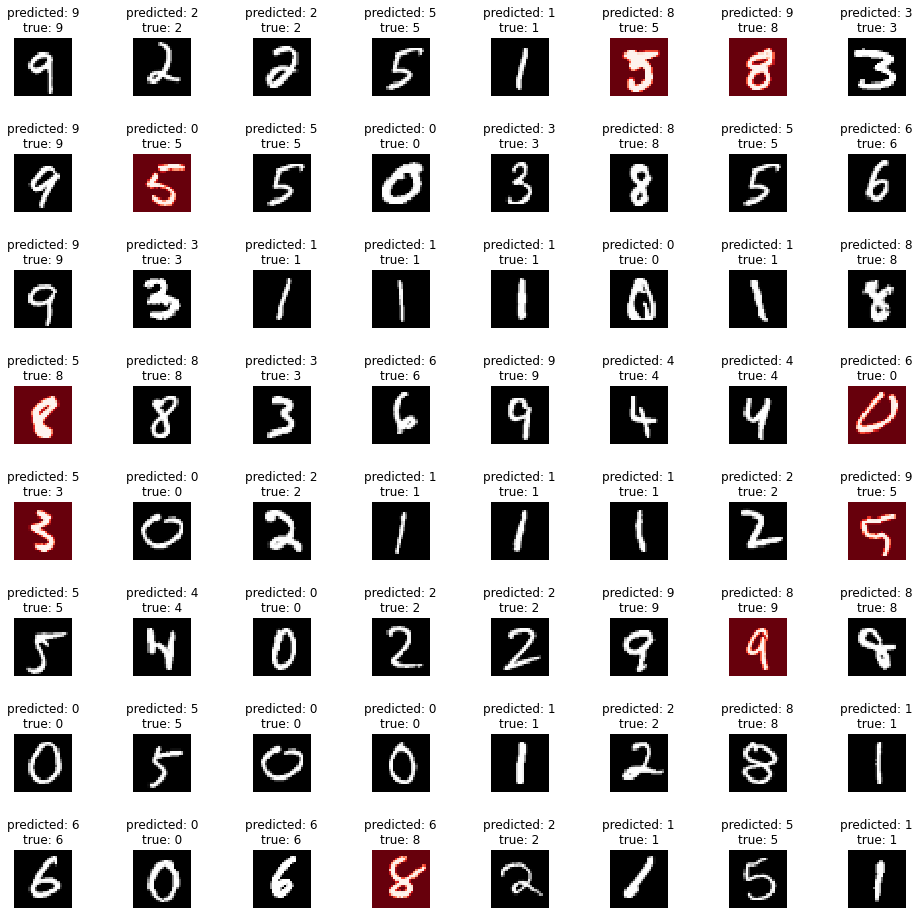

In [31]:
predicted = cnn.predict(x_test).argmax(axis=-1) # Use neural network to predict labels of test set

plot_classifications(x_test, y_test, predicted)

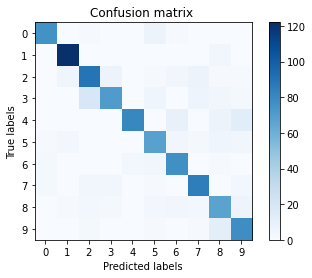

In [32]:
cm = confusion_matrix(y_test, predicted, labels=range(10))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(range(10))
plt.yticks(range(10))
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

# CNN AE
---

In [33]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(16, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Flatten()(x)
x = Dense(2, activation=None)(x) # Note, we want don't want an activation function here, we just want to return the values in the latent space
output = Dense(10, activation='softmax')(x)

encoder = Model(input_img, output)

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1570

In [34]:
encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
encoder.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=256, verbose=1)

Epoch 1/10
19/19 [==============================] - 1s 54ms/step - loss: 2.2504 - accuracy: 0.1808 - val_loss: 2.1692 - val_accuracy: 0.2417
Epoch 2/10
19/19 [==============================] - 1s 46ms/step - loss: 2.0605 - accuracy: 0.2404 - val_loss: 1.9242 - val_accuracy: 0.2650
Epoch 3/10
19/19 [==============================] - 1s 45ms/step - loss: 1.8566 - accuracy: 0.2742 - val_loss: 1.7643 - val_accuracy: 0.2917
Epoch 4/10
19/19 [==============================] - 1s 44ms/step - loss: 1.7248 - accuracy: 0.3073 - val_loss: 1.6646 - val_accuracy: 0.3150
Epoch 5/10
19/19 [==============================] - 1s 42ms/step - loss: 1.6395 - accuracy: 0.3260 - val_loss: 1.5853 - val_accuracy: 0.3458
Epoch 6/10
19/19 [==============================] - 1s 42ms/step - loss: 1.5699 - accuracy: 0.3350 - val_loss: 1.5195 - val_accuracy: 0.3558
Epoch 7/10
19/19 [==============================] - 1s 44ms/step - loss: 1.5097 - accuracy: 0.3485 - val_loss: 1.4533 - val_accuracy: 0.3617
Epoch 8/10
19

In [35]:
predicted = encoder.predict(x_test).argmax(axis=-1) # Use neural network to predict labels of test set

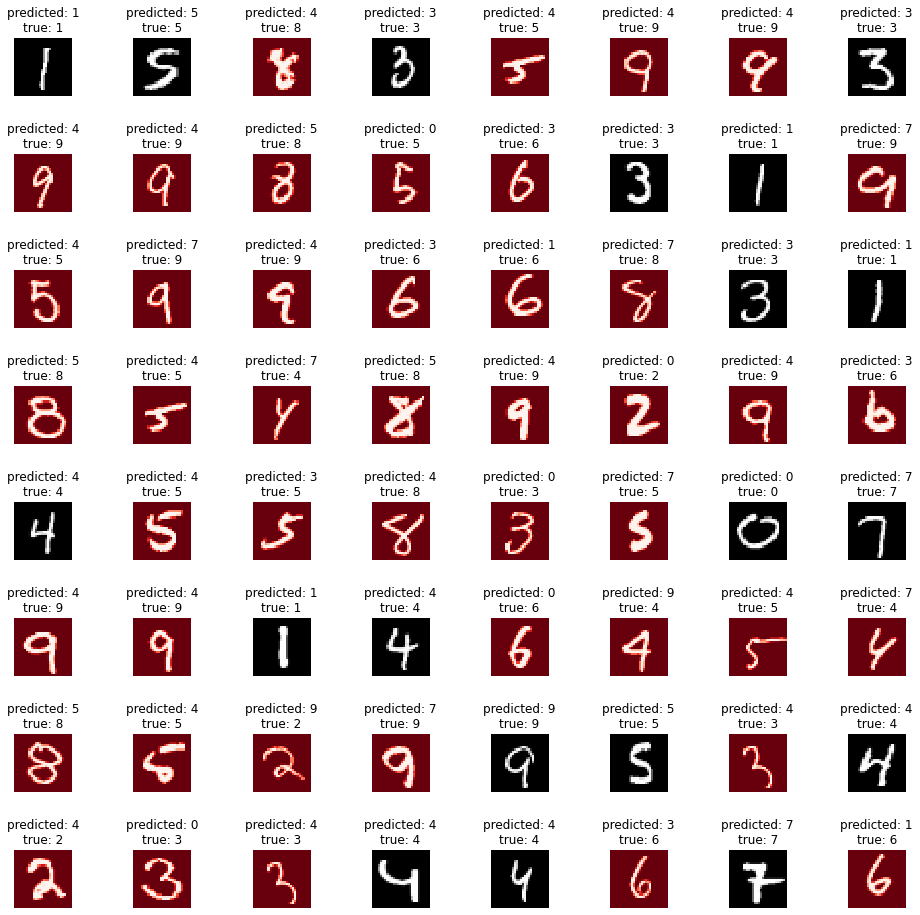

In [36]:
plot_classifications(x_test, y_test, predicted)

In [37]:
new_model = Model(encoder.input, outputs=encoder.layers[-2].output)

In [38]:
latent_output = new_model.predict(x_train)
xlim, ylim = np.array([latent_output.min(axis=0), latent_output.max(axis=0)]).T # Find the maximum extent of activations which we use to set xlim and ylim for 2dhist plots

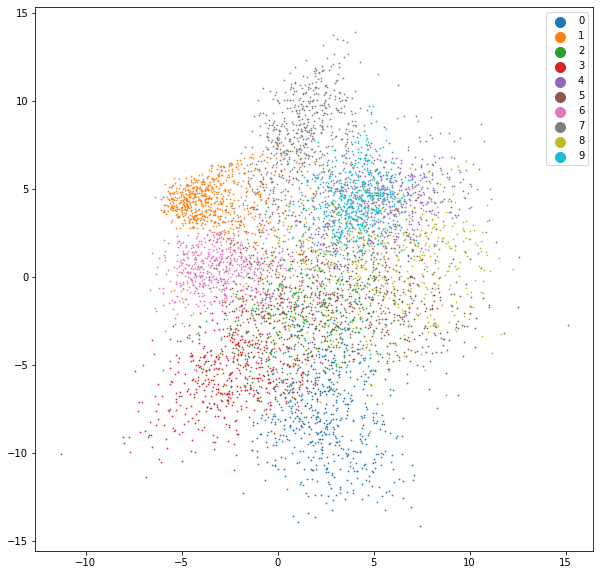

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for i in range(n_classes):
    mask = y_train == i
    ax.scatter(*latent_output[mask].T, s=0.5, label=i)

lgnd = ax.legend()
for handle in lgnd.legendHandles:
    handle.set_sizes([100])
